In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [5]:
data= pd.read_csv('cleaned_survey.csv', sep = ',')

In [6]:
#create new df with selected qns

data1 = data.filter(['Q1.3', 'Q1.4', 'Q4.3', 'Q4.5', 'Q4.2', 'Q4.1', 'Q5.1', 
                     'Q5.4_1', 'Q5.4_2', 'Q5.4_3', 'Q5.4_4', 'Q5.4_5', 'Q5.4_6', 'Q5.4_7', 
                     'Q6.1_1', 'Q6.1_2', 'Q6.1_3', 'Q6.1_5'], axis=1)

In [7]:
data1.head()

,Q1.3,Q1.4,Q4.3,Q4.5,Q4.2,Q4.1,Q5.1,Q5.4_1,Q5.4_2,Q5.4_3,Q5.4_4,Q5.4_5,Q5.4_6,Q5.4_7,Q6.1_1,Q6.1_2,Q6.1_3,Q6.1_5
0,Female,Chinese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Yes,Yes
1,Female,Chinese,NaN,NaN,NaN,NaN,I do not intend to vape,Agree,Strongly Agree,Agree,Agree,Strongly Agree,Disagree,Agree,No,No,Yes,Yes
2,Female,Chinese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,Yes
3,Female,"Others, please specify",NaN,NaN,NaN,NaN,I am unsure,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Disagree,Agree,No,No,Yes,I don't know
4,Female,"Others, please specify",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#rename columns to variables

data1.rename(columns = {'Q1.3': 'gender', 'Q1.4': 'ethnicity', 'Q4.3' : 'how_they_spend_time', 'Q4.5' : 'attempted_to_advise', 'Q4.2' : 'time_spent_in_a_week', 'Q4.1' : 'how_long_they_known_each_other', 'Q5.1' : 'intention_to_try_vapes', 'Q5.4_1' : 'reason_for_not_vaping_Expensive', 'Q5.4_2' : 'reason_for_not_vaping_More_harmful_than_cigarettes', 'Q5.4_3' : 'reason_for_not_vaping_Smells_worse_than_cigarettes', 'Q5.4_4' : 'reason_for_not_vaping_Harmful_to_health' , 'Q5.4_5' : 'reason_for_not_vaping_Addictive', 'Q5.4_6' : 'reason_for_not_vaping_Unsure_where_to_get_from', 'Q5.4_7' : 'reason_for_not_vaping_Others', 'Q6.1_1' : 'vaping_is_legal', 'Q6.1_2' : 'vaping_is_healthier_than_smoking', 'Q6.1_3': 'vape_contains_nicotine', 'Q6.1_5': 'vaping_causes_second-hand_smoke'}, inplace= True)

In [9]:
#keep rows with non-na values
df = data1[data1['attempted_to_advise'].notna()]
df

,gender,ethnicity,how_they_spend_time,attempted_to_advise,time_spent_in_a_week,how_long_they_known_each_other,intention_to_try_vapes,reason_for_not_vaping_Expensive,reason_for_not_vaping_More_harmful_than_cigarettes,reason_for_not_vaping_Smells_worse_than_cigarettes,reason_for_not_vaping_Harmful_to_health,reason_for_not_vaping_Addictive,reason_for_not_vaping_Unsure_where_to_get_from,reason_for_not_vaping_Others,vaping_is_legal,vaping_is_healthier_than_smoking,vape_contains_nicotine,vaping_causes_second-hand_smoke
7,Female,Malay,"School activities (e.g. CCA, class, projects e...",I would like to help but not know where to start.,2?,5,I do not intend to vape,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Agree,No,No,Yes,I don't know
8,Female,Chinese,"School activities (e.g. CCA, class, projects e...",I did not attempt to stop my friend from vaping.,0,4,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,Yes,No,Yes
10,Male,Chinese,"School activities (e.g. CCA, class, projects e...",I would like to help but not know where to start.,0.01,2,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,No,Yes,Yes
11,Male,Chinese,Dining (e.g. hanging out for lunch/dinner),I did not attempt to stop my friend from vaping.,>10000,6,I do not intend to vape,Agree,Agree,Agree,Strongly Agree,Agree,Strongly Disagree,Agree,No,No,Yes,I don't know
19,Male,Chinese,"School activities (e.g. CCA, class, projects e...",I tried to advise/advised my friends to stop v...,0,5,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Yes,Yes,Yes,Yes
20,Male,Chinese,Dining (e.g. hanging out for lunch/dinner),I did not attempt to stop my friend from vaping.,3,5,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,No,Yes,No
22,Male,Indian,Dining (e.g. hanging out for lunch/dinner),I tried to advise/advised my friends to stop v...,1,5,I do not intend to vape,Agree,Agree,Disagree,Strongly Agree,Strongly Agree,Disagree,Agree,No,No,Yes,I don't know
32,Female,Chinese,Dining (e.g. hanging out for lunch/dinner),I tried to advise/advised my friends to stop v...,10,1,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Agree,No,No,Yes,Yes
33,Male,Chinese,"Recreational activities (e.g. Karaoke, sports ...",I tried to advise/advised my friends to stop v...,2,5,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,No,Yes,Yes
34,Female,Chinese,Others (please specify),I did not attempt to stop my friend from vaping.,2,7,I do not intend to vape,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Agree,No,No,Yes,No


In [10]:
#convert non-numeric values to numeric
df2 = df[df['time_spent_in_a_week'].apply(lambda x: x.isnumeric())]
df3 = df2[df2['how_long_they_known_each_other'].apply(lambda x: x.isnumeric())]

df3['time_spent_in_a_week'] = df3['time_spent_in_a_week'].astype('int')
df3['how_long_they_known_each_other'] = df3['how_long_they_known_each_other'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#Data Prep
#remove () in how they spend time together row values

df3['how_they_spend_time'] = df3['how_they_spend_time'].str.replace(r"\(.*\)","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
df3

,gender,ethnicity,how_they_spend_time,attempted_to_advise,time_spent_in_a_week,how_long_they_known_each_other,intention_to_try_vapes,reason_for_not_vaping_Expensive,reason_for_not_vaping_More_harmful_than_cigarettes,reason_for_not_vaping_Smells_worse_than_cigarettes,reason_for_not_vaping_Harmful_to_health,reason_for_not_vaping_Addictive,reason_for_not_vaping_Unsure_where_to_get_from,reason_for_not_vaping_Others,vaping_is_legal,vaping_is_healthier_than_smoking,vape_contains_nicotine,vaping_causes_second-hand_smoke
8,Female,Chinese,School activities,I did not attempt to stop my friend from vaping.,0,4,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,Yes,No,Yes
19,Male,Chinese,School activities,I tried to advise/advised my friends to stop v...,0,5,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Yes,Yes,Yes,Yes
20,Male,Chinese,Dining,I did not attempt to stop my friend from vaping.,3,5,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,No,Yes,No
22,Male,Indian,Dining,I tried to advise/advised my friends to stop v...,1,5,I do not intend to vape,Agree,Agree,Disagree,Strongly Agree,Strongly Agree,Disagree,Agree,No,No,Yes,I don't know
32,Female,Chinese,Dining,I tried to advise/advised my friends to stop v...,10,1,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Agree,No,No,Yes,Yes
33,Male,Chinese,Recreational activities,I tried to advise/advised my friends to stop v...,2,5,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,No,Yes,Yes
34,Female,Chinese,Others,I did not attempt to stop my friend from vaping.,2,7,I do not intend to vape,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Agree,No,No,Yes,No
38,Female,Chinese,School activities,I did not attempt to stop my friend from vaping.,5,1,I do not intend to vape,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Disagree,Agree,No,No,Yes,Yes
52,Male,Chinese,School activities,I did not attempt to stop my friend from vaping.,5,3,I do not intend to vape,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,I don't know,I don't know,I don't know,I don't know
59,Female,Indian,School activities,I did not attempt to stop my friend from vaping.,15,3,I do not intend to vape,Strongly Disagree,Agree,Agree,Agree,Strongly Agree,Disagree,Agree,No,I don't know,Yes,I don't know


In [13]:
#Group 
#group values into 2 groups: less than 10 hours a week and 10 or more hours a week
df3.loc[df3['time_spent_in_a_week'] < 10, 'time_spent_in_a_week1'] = 'less than 10'
df3.loc[df3['time_spent_in_a_week'] >= 10, 'time_spent_in_a_week1'] = '10 or more'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
#Group 
#group values into 2 groups: less than 5 years and 5 or more years

df3.loc[df3['how_long_they_known_each_other'] < 5, 'how_long_they_known_each_other1'] = 'less than 5'
df3.loc[df3['how_long_they_known_each_other'] >= 5, 'how_long_they_known_each_other1'] = '5 or more'

In [15]:
#Reverse coding of Q5.4_3

df3.loc[df3['reason_for_not_vaping_Smells_worse_than_cigarettes'] == 'Strongly Agree', 'reason_for_not_vaping_Smells_worse_than_cigarettes1'] = 'Strongly Disagree'
df3.loc[df3['reason_for_not_vaping_Smells_worse_than_cigarettes'] == 'Strongly Disagree', 'reason_for_not_vaping_Smells_worse_than_cigarettes1'] = 'Strongly Agree'
df3.loc[df3['reason_for_not_vaping_Smells_worse_than_cigarettes'] == 'Disagree', 'reason_for_not_vaping_Smells_worse_than_cigarettes1'] = 'Agree'
df3.loc[df3['reason_for_not_vaping_Smells_worse_than_cigarettes'] == 'Agree', 'reason_for_not_vaping_Smells_worse_than_cigarettes1'] = 'Disagree'

In [16]:
#drop columns 
data = df3.drop(['time_spent_in_a_week', 'how_long_they_known_each_other', 'reason_for_not_vaping_Smells_worse_than_cigarettes'], axis = 1)

In [17]:
data

,gender,ethnicity,how_they_spend_time,attempted_to_advise,intention_to_try_vapes,reason_for_not_vaping_Expensive,reason_for_not_vaping_More_harmful_than_cigarettes,reason_for_not_vaping_Harmful_to_health,reason_for_not_vaping_Addictive,reason_for_not_vaping_Unsure_where_to_get_from,reason_for_not_vaping_Others,vaping_is_legal,vaping_is_healthier_than_smoking,vape_contains_nicotine,vaping_causes_second-hand_smoke,time_spent_in_a_week1,how_long_they_known_each_other1,reason_for_not_vaping_Smells_worse_than_cigarettes1
8,Female,Chinese,School activities,I did not attempt to stop my friend from vaping.,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,Yes,No,Yes,less than 10,less than 5,Strongly Disagree
19,Male,Chinese,School activities,I tried to advise/advised my friends to stop v...,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Yes,Yes,Yes,Yes,less than 10,5 or more,Strongly Disagree
20,Male,Chinese,Dining,I did not attempt to stop my friend from vaping.,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,No,Yes,No,less than 10,5 or more,Strongly Disagree
22,Male,Indian,Dining,I tried to advise/advised my friends to stop v...,I do not intend to vape,Agree,Agree,Strongly Agree,Strongly Agree,Disagree,Agree,No,No,Yes,I don't know,less than 10,5 or more,Agree
32,Female,Chinese,Dining,I tried to advise/advised my friends to stop v...,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Agree,No,No,Yes,Yes,10 or more,less than 5,Strongly Agree
33,Male,Chinese,Recreational activities,I tried to advise/advised my friends to stop v...,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,No,No,Yes,Yes,less than 10,5 or more,Strongly Agree
34,Female,Chinese,Others,I did not attempt to stop my friend from vaping.,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Agree,No,No,Yes,No,less than 10,5 or more,Disagree
38,Female,Chinese,School activities,I did not attempt to stop my friend from vaping.,I do not intend to vape,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,No,No,Yes,Yes,less than 10,less than 5,Disagree
52,Male,Chinese,School activities,I did not attempt to stop my friend from vaping.,I do not intend to vape,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,I don't know,I don't know,I don't know,I don't know,less than 10,less than 5,Strongly Disagree
59,Female,Indian,School activities,I did not attempt to stop my friend from vaping.,I do not intend to vape,Strongly Disagree,Agree,Agree,Strongly Agree,Disagree,Agree,No,I don't know,Yes,I don't know,10 or more,less than 5,Disagree


In [18]:
#Encoding dependent variable.
outcome = {'I tried to advise/advised my friends to stop vaping.': 1, 'I did not attempt to stop my friend from vaping.':0, 'I would like to help but not know where to start.': 1}
data['class'] = data['attempted_to_advise'].map(outcome)

In [19]:
#data1['class'].value_counts()
data.drop(['attempted_to_advise', 'reason_for_not_vaping_Others'],  axis = 1, inplace= True)

In [20]:
data

,gender,ethnicity,how_they_spend_time,intention_to_try_vapes,reason_for_not_vaping_Expensive,reason_for_not_vaping_More_harmful_than_cigarettes,reason_for_not_vaping_Harmful_to_health,reason_for_not_vaping_Addictive,reason_for_not_vaping_Unsure_where_to_get_from,vaping_is_legal,vaping_is_healthier_than_smoking,vape_contains_nicotine,vaping_causes_second-hand_smoke,time_spent_in_a_week1,how_long_they_known_each_other1,reason_for_not_vaping_Smells_worse_than_cigarettes1,class
8,Female,Chinese,School activities,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,No,Yes,No,Yes,less than 10,less than 5,Strongly Disagree,0
19,Male,Chinese,School activities,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Yes,Yes,Yes,Yes,less than 10,5 or more,Strongly Disagree,1
20,Male,Chinese,Dining,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,No,No,Yes,No,less than 10,5 or more,Strongly Disagree,0
22,Male,Indian,Dining,I do not intend to vape,Agree,Agree,Strongly Agree,Strongly Agree,Disagree,No,No,Yes,I don't know,less than 10,5 or more,Agree,1
32,Female,Chinese,Dining,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,No,No,Yes,Yes,10 or more,less than 5,Strongly Agree,1
33,Male,Chinese,Recreational activities,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,No,No,Yes,Yes,less than 10,5 or more,Strongly Agree,1
34,Female,Chinese,Others,I do not intend to vape,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,No,No,Yes,No,less than 10,5 or more,Disagree,0
38,Female,Chinese,School activities,I do not intend to vape,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,No,No,Yes,Yes,less than 10,less than 5,Disagree,0
52,Male,Chinese,School activities,I do not intend to vape,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,I don't know,I don't know,I don't know,I don't know,less than 10,less than 5,Strongly Disagree,0
59,Female,Indian,School activities,I do not intend to vape,Strongly Disagree,Agree,Agree,Strongly Agree,Disagree,No,I don't know,Yes,I don't know,10 or more,less than 5,Disagree,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 8 to 73
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   gender                                               14 non-null     object
 1   ethnicity                                            14 non-null     object
 2   how_they_spend_time                                  14 non-null     object
 3   intention_to_try_vapes                               14 non-null     object
 4   reason_for_not_vaping_Expensive                      14 non-null     object
 5   reason_for_not_vaping_More_harmful_than_cigarettes   14 non-null     object
 6   reason_for_not_vaping_Harmful_to_health              14 non-null     object
 7   reason_for_not_vaping_Addictive                      14 non-null     object
 8   reason_for_not_vaping_Unsure_where_to_get_from       14 non-null     object
 9   v

In [22]:
data1 = pd.get_dummies(data = data, columns = ['gender', 'ethnicity', 'how_they_spend_time', 'time_spent_in_a_week1', 'how_long_they_known_each_other1', 'intention_to_try_vapes', 'reason_for_not_vaping_Expensive', 'reason_for_not_vaping_More_harmful_than_cigarettes', 'reason_for_not_vaping_Smells_worse_than_cigarettes1', 'reason_for_not_vaping_Harmful_to_health' , 'reason_for_not_vaping_Addictive', 'reason_for_not_vaping_Unsure_where_to_get_from', 'vaping_is_legal', 'vaping_is_healthier_than_smoking', 'vape_contains_nicotine', 'vaping_causes_second-hand_smoke']) # drop_first = True)

In [23]:
data1.head()

,class,gender_Female,gender_Male,ethnicity_Chinese,ethnicity_Indian,how_they_spend_time_Dining,how_they_spend_time_Others,how_they_spend_time_Recreational activities,how_they_spend_time_School activities,time_spent_in_a_week1_10 or more,...,vaping_is_legal_Yes,vaping_is_healthier_than_smoking_I don't know,vaping_is_healthier_than_smoking_No,vaping_is_healthier_than_smoking_Yes,vape_contains_nicotine_I don't know,vape_contains_nicotine_No,vape_contains_nicotine_Yes,vaping_causes_second-hand_smoke_I don't know,vaping_causes_second-hand_smoke_No,vaping_causes_second-hand_smoke_Yes
8,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
19,1,0,1,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
20,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
22,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
32,1,1,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 8 to 73
Data columns (total 43 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   class                                                                  14 non-null     int64
 1   gender_Female                                                          14 non-null     uint8
 2   gender_Male                                                            14 non-null     uint8
 3   ethnicity_Chinese                                                      14 non-null     uint8
 4   ethnicity_Indian                                                       14 non-null     uint8
 5   how_they_spend_time_Dining                                             14 non-null     uint8
 6   how_they_spend_time_Others                                             14 non-null     uint8
 7   how_they_s

In [25]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [26]:
# Get the predictors and target; the x and y variables from the dataset
x = data1.drop(columns= 'class') #indep variables
y = data1['class'] #dependent variable (target)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 1)

In [28]:
# Instantiate dt and criterion can be gini or entropy
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 99)
    
# Fit dt to the training set
dt.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=4, random_state=99)

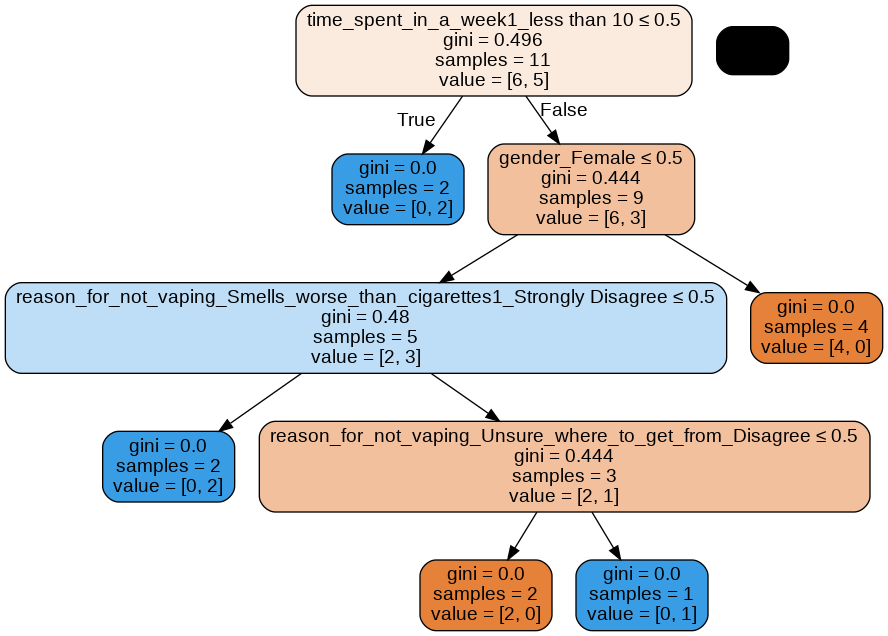

In [29]:
#plot decision tree
from sklearn.tree import export_graphviz
import pydotplus
#from sklearn.externals.six import StringIO  
import six
from six import StringIO
from IPython.display import Image

feature_cols = X_train.columns

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('vapingTree.png')
Image(graph.create_png())

In [30]:
feat_impt = pd.Series(dt.feature_importances_, index = X_train.columns)

# Sort the variable importance
sorted_feat_impt = feat_impt.sort_values()

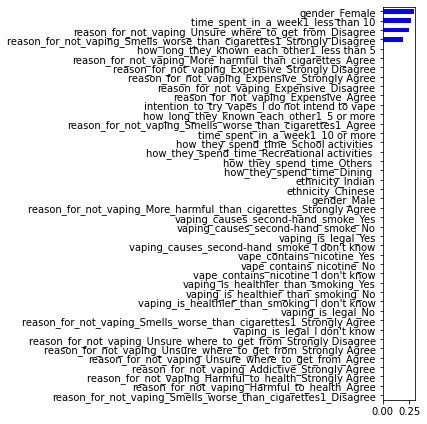

In [31]:
# Make a horizontal bar plot
sorted_feat_impt.plot(kind='barh', color='blue', figsize = (6,6))
plt.tight_layout()
plt.show()

In [32]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred)

[1 1 0]


Evaluation of Model


In [33]:
#Print the accuracy of labels predicted.

print("Accuracy for Decision Tree :")
print(round(accuracy_score(y_test, y_pred), 3)) #comparing the actual target with the prediction

Accuracy for Decision Tree :
0.667


In [34]:
#Confusion matrix
# label = 1 = subscribed to term deposit 

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
cf = pd.DataFrame(cnf_matrix, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf

,Predicted pos,Predicted neg
Actual pos,1,0
Actual neg,1,1


In [35]:
print(type(cnf_matrix))
cf = pd.DataFrame(cnf_matrix, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf

<class 'numpy.ndarray'>


,Predicted pos,Predicted neg
Actual pos,1,0
Actual neg,1,1


In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)

print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))

Specificity : 0.5
Precision : 0.5
Recall or Sensitivity : 1.0
